In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
gapminder = pd.read_csv("E:/DataCamp/7. Cleaning data in python/6. Datasets/gapminder.csv")

In [18]:
gapminder.head()
cols = list(gapminder.columns.values)

In [4]:
# setting life expectany as the first column and renaming it followed by slicing
gapminder["Unnamed: 0"] = gapminder["Life expectancy"]
gapminder = gapminder.rename(columns={'Life expectancy': 'Ex Life expec'})
gapminder = gapminder.rename(columns={'Unnamed: 0': 'Life expectancy'})
gapminder
g1800s = gapminder.iloc[:, 0:101]

In [5]:
g1800s.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


In [6]:
# Visualizing your data -
# Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to conrm this.
# Here, the goal is to visually check the data for insights as well as errors. 
# When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. 
# This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. 



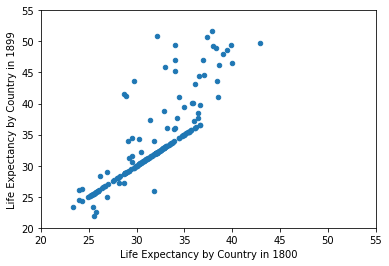

In [7]:

#Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')
#Specify axis labels 
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')
#Specify axis limits
plt.xlim(20, 55) 
plt.ylim(20, 55)
#Display the plot 
plt.show()


In [8]:
# Define a function called check_null_or_valid() that takes in one argument: row_data 

In [9]:
def check_null_or_valid(row_data):
    
    """Function that takes a row of data, drops all missing values,and checks if all remaining values are greater than or equal to 0 """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0 
    return ge0


In [10]:
# Check whether the first column is 'Life expectancy' 
assert g1800s.columns[0] == 'Life expectancy'


In [11]:
# Check whether the values in the row are valid 
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()


In [17]:
 #Check that there is only one instance of each country 
#assert g1800s['Life expectancy'].value_counts()[0] == 1
 

In [21]:
# Drop the missing values 
g1800s = g1800s.dropna(axis=0,how='any')



In [23]:
# Print the shape of g1800s 
print(g1800s.shape)

(201, 101)


In [24]:
g1800s = g1800s.drop_duplicates()

In [34]:
# Print the shape of g1800s 
print(g1800s.shape)


(201, 101)


In [35]:

g1800s_melt = pd.melt(g1800s, id_vars='Life expectancy')
g1800s_melt.head()


,Life expectancy,variable,value
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Angola,1800,26.98
4,Antigua and Barbuda,1800,33.54


In [37]:
# Rename the columns
g1800s_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(g1800s_melt.head())

               country  year  life_expectancy
0          Afghanistan  1800            28.21
1              Albania  1800            35.40
2              Algeria  1800            28.82
3               Angola  1800            26.98
4  Antigua and Barbuda  1800            33.54


In [39]:
# Group g1800s_melt: 
g1800s_agg = g1800s_melt.groupby('year')['life_expectancy'].mean()


In [40]:
g1800s_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

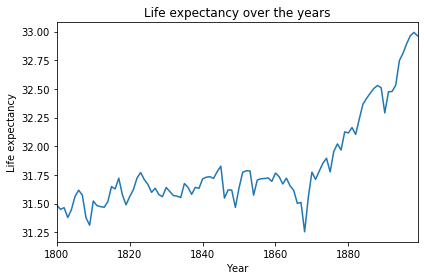

In [41]:
# Create a line plot of life expectancy per year 
g1800s_agg.plot()
# Add title and specify axis labels 
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy') 
plt.xlabel('Year')
# Display the plot
plt.tight_layout() 
plt.show()


In [44]:
# Saving after cleaning
g1800s_melt.to_csv('E:/ModifiedData/g1800s_melt.csv')
